# Netflix Data visualization
The aim of this project is to visualize the netflix data using plotly and find some interesting facts about the movies it released over the years

## Importing necessary libraries

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import kaleido

In [30]:
df = pd.read_csv('netflix1.csv') # Loading the dataset

In [31]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## Data cleaning


In [33]:
df.type.value_counts() # Checking the values in the "type" column

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [34]:
df['date_added'] = pd.to_datetime(df['date_added']) # Changing the date_added column type to date

In [35]:
df.rating.value_counts() # Checking the value of ratings

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [36]:
df.duration.value_counts() # Checking the values of duration

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

### listed_in column

In [37]:
split_df = df['listed_in'].str.split(',', expand=True)
split_df.columns = ['Category_1', 'Category_2', 'Category_3'] # Splitting the listed_in column into multiple columns so that each category is in different column

In [38]:
split_df

,Category_1,Category_2,Category_3
0,Documentaries,None,None
1,Crime TV Shows,International TV Shows,TV Action & Adventure
2,TV Dramas,TV Horror,TV Mysteries
3,Children & Family Movies,Comedies,None
4,Dramas,Independent Movies,International Movies
...,...,...,...
8785,International TV Shows,TV Dramas,None
8786,Kids' TV,None,None
8787,International TV Shows,Romantic TV Shows,TV Dramas
8788,Kids' TV,None,None


In [39]:
df = pd.concat([df, split_df], axis=1) # Concatenating the new columns into the original dataframe

# Dropping the original 'listed_in' column
df.drop('listed_in', axis=1, inplace=True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,Category_1,Category_2,Category_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,Independent Movies,International Movies


In [40]:
mask = df['duration'].str.endswith((' Season', ' Seasons')) # Getting the values with "Season" or "Seasons" suffixes


df['duration(in seasons)'] = np.where(mask, df['duration'], np.nan) # Copy values with "Season" suffix to a new column


df.loc[mask, 'duration'] = np.nan # Removing the values for "duration" for TV shows

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,Category_1,Category_2,Category_3,duration(in seasons)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None,None,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,NaN,Crime TV Shows,International TV Shows,TV Action & Adventure,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,NaN,TV Dramas,TV Horror,TV Mysteries,1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,Comedies,None,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,Independent Movies,International Movies,NaN


In [41]:
df['duration'] = df['duration'].str.replace(r' min$', '', regex=True) # Removing the "min" in the duration column
df['duration'].replace('NaN', pd.NA, inplace=True) # Replacing the numpy NaN to pandas NaN


df['duration'] = df['duration'].astype('Int64') # Converting the column to integer type
df = df.rename(columns={'duration': 'duration(in min)'}) # Renaming the column to "duration (in min)" for Movies

In [42]:
df['duration(in seasons)'] = df['duration(in seasons)'].str.replace(r' Seasons?$', '', regex=True) # Removing the "Season" and "Season" suffixes for duration(in seasons) column
df['duration(in seasons)'] = df['duration(in seasons)'].astype('Int64') # Converting the column to integer type

In [43]:
df.head(15)

,show_id,type,title,director,country,date_added,release_year,rating,duration(in min),Category_1,Category_2,Category_3,duration(in seasons)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,None,None,<NA>
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,<NA>,Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,<NA>,TV Dramas,TV Horror,TV Mysteries,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91,Children & Family Movies,Comedies,None,<NA>
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125,Dramas,Independent Movies,International Movies,<NA>
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,<NA>,British TV Shows,Reality TV,None,9
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104,Comedies,Dramas,None,<NA>
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87,Children & Family Movies,Comedies,Music & Musicals,<NA>
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127,Dramas,International Movies,None,<NA>
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76,Children & Family Movies,Music & Musicals,None,<NA>


## Data Visualization

In [44]:
# Saving the colors I am going to use for the visualizations in variables
netflix_red = "#E50914"
netflix_black = "#221F1F"
netflix_white = "#FFFFFF"

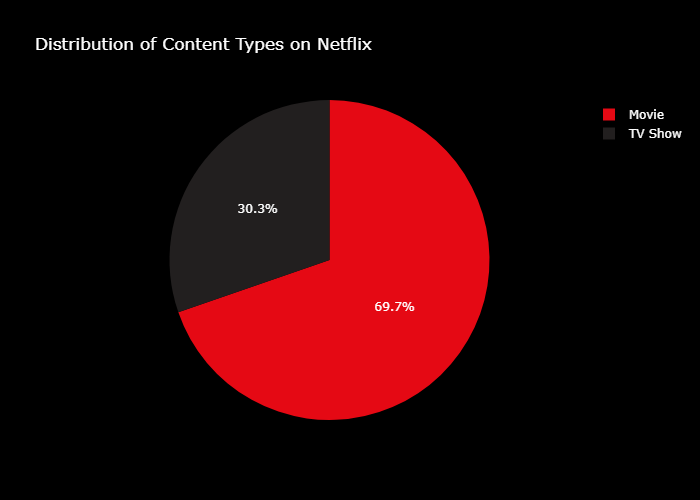

In [46]:
type_counts = df['type'].value_counts()

fig = px.pie(names=type_counts.index, values=type_counts.values,
             title='Distribution of Content Types on Netflix',
             color_discrete_sequence=[netflix_red, netflix_black])

# Customizing chart background
fig.update_layout({
    'paper_bgcolor': "black",
    'font_color': "white",
    'title_font_color': "white"})

# Showing the plot
fig.show("png")


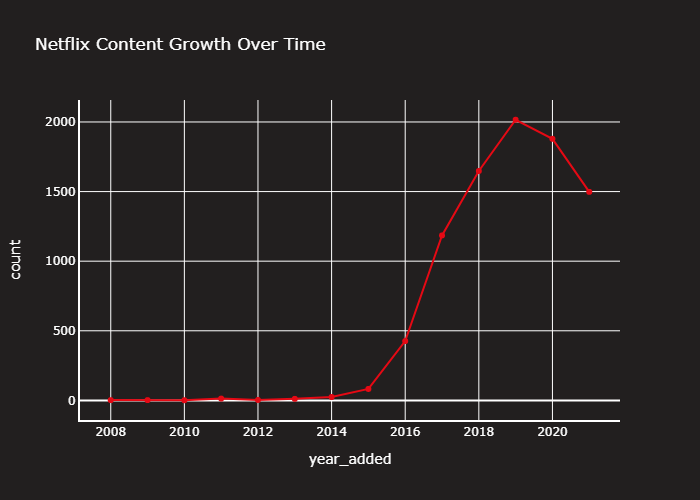

In [47]:
# Extracting year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Counting the number of titles added each year
yearly_content = df.groupby('year_added').size().reset_index(name='count')

fig = px.line(yearly_content, x='year_added', y='count', markers=True,
              title='Netflix Content Growth Over Time',
              line_shape='linear',  # Ensures straight line segments
              color_discrete_sequence=[netflix_red])  # Line and marker color

# Customizing chart background and font colors to match the colors I set earlier
fig.update_layout({
    'plot_bgcolor': netflix_black,
    'paper_bgcolor': netflix_black,
    'title_font_color': netflix_white,
    'font_color': netflix_white})

# Adjusting the gridlines and axis colors to be white for contrast
fig.update_xaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)
fig.update_yaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)

# Showing the plot
fig.show("png")

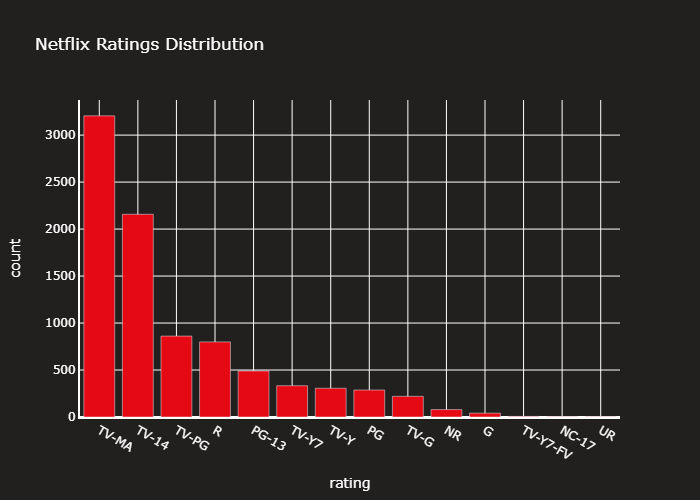

In [48]:
# Extracting the counts of ratings for each movie
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

fig = px.bar(rating_counts, x='rating', y='count',
             title='Netflix Ratings Distribution',
             color_discrete_sequence=[netflix_red])  # Setting the bars to Netflix red

# Customizing chart background and font colors
fig.update_layout({
    'plot_bgcolor': netflix_black,
    'paper_bgcolor': netflix_black,
    'title_font_color': netflix_white,
    'font_color': netflix_white})


fig.update_xaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)
fig.update_yaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)

# Showing the plot
fig.show("png")

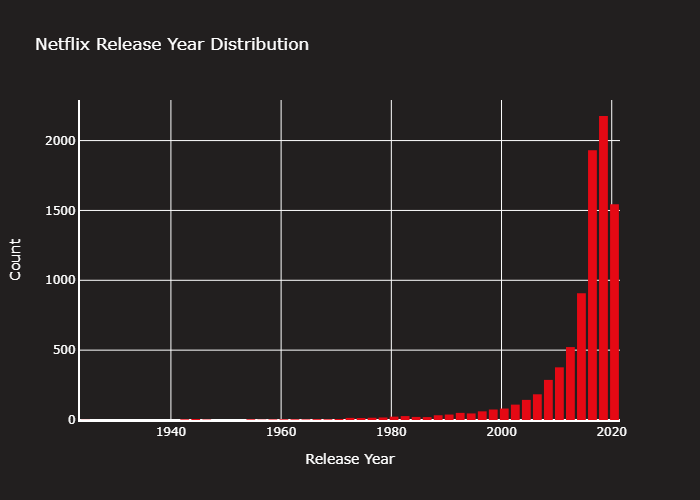

In [49]:
fig = px.histogram(df, x='release_year', nbins=50,
                   title='Netflix Release Year Distribution',
                   color_discrete_sequence=[netflix_red])

# Customizing the plot with Netflix colors
fig.update_layout(
    plot_bgcolor=netflix_black,
    paper_bgcolor=netflix_black,
    title_font_color=netflix_white,
    font_color=netflix_white,
    xaxis_title="Release Year",
    yaxis_title="Count",
    bargap=0.2)

fig.update_xaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)
fig.update_yaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)

# Show the plot
fig.show("png")

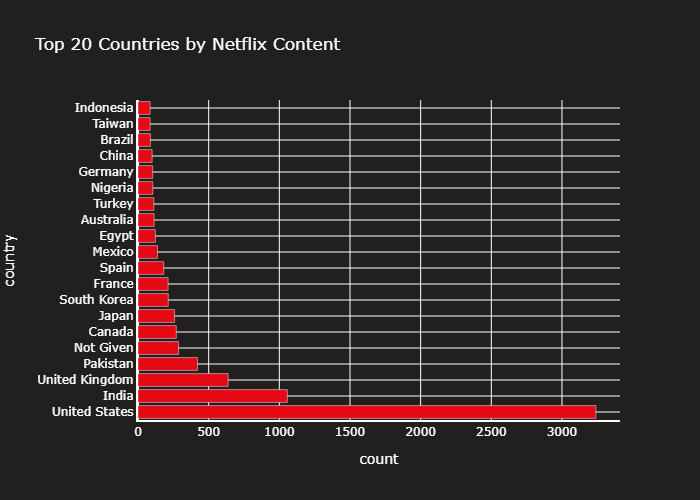

In [50]:
# Extracting the counts of countries for each movie
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.bar(country_counts.head(20), x='count', y='country', orientation='h',
             title='Top 20 Countries by Netflix Content',
             color_discrete_sequence=[netflix_red])

# Customizing chart background and font colors
fig.update_layout({
    'plot_bgcolor': netflix_black,
    'paper_bgcolor': netflix_black,
    'title_font_color': netflix_white,
    'font_color': netflix_white})

# Adjusting the axis colors
fig.update_xaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)
fig.update_yaxes(showline=True, linewidth=2, linecolor=netflix_white, gridcolor=netflix_white)

# Showing the plot
fig.show("png")

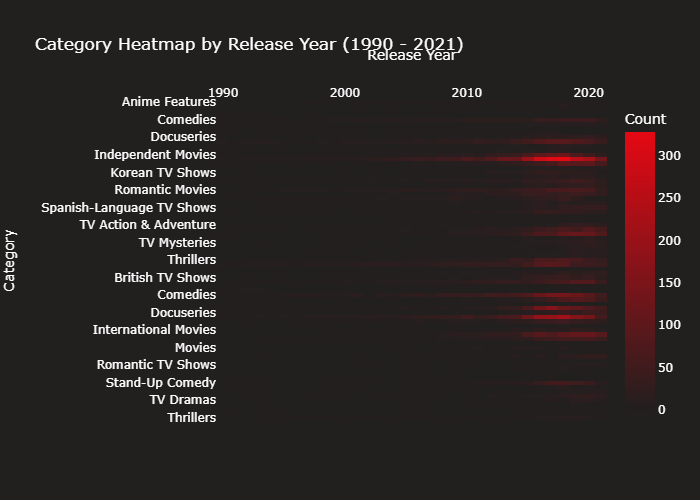

In [51]:
# Melting the df to get a single column for categories
melted_df = df.melt(id_vars=['show_id', 'release_year'], value_vars=['Category_1', 'Category_2', 'Category_3'],
                    var_name='Category_Type', value_name='Category').dropna()

# Removing any rows where Category is NaN
melted_df = melted_df[melted_df['Category'].notna() & (melted_df['Category'] != '')]

# Filtering the melted_df for release years between 1990 and 2021, inclusive
melted_df_filtered = melted_df[(melted_df['release_year'] >= 1990) & (melted_df['release_year'] <= 2021)]

# Creating a pivot table counting the number of titles in each category by filtered release year
pivot_table = melted_df_filtered.pivot_table(index='Category', columns='release_year', aggfunc='size', fill_value=0)

# Plotting the heatmap
fig = px.imshow(pivot_table, aspect="auto", color_continuous_scale=[netflix_black, netflix_red],
                labels=dict(x="Release Year", y="Category", color="Count"),
                title="Category Heatmap by Release Year (1990 - 2021)")
fig.update_xaxes(side="top")

fig.update_layout(
    title_font_color=netflix_white,
    font_color=netflix_white,
    paper_bgcolor=netflix_black,
    plot_bgcolor=netflix_black)

fig.update_xaxes(side="top", tickfont=dict(color=netflix_white))  # X-axis ticks color
fig.update_yaxes(tickfont=dict(color=netflix_white))  # Y-axis ticks color

fig.show("png")

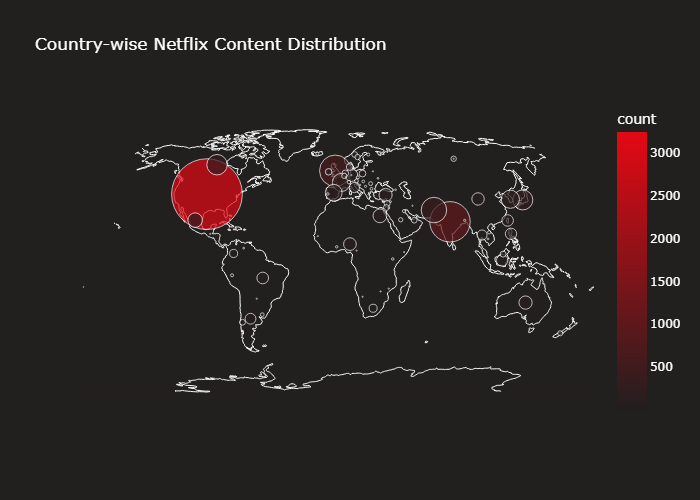

In [52]:
# Extracting the counts of countries for each movie
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Creating a world map with Netflix colors
fig = px.scatter_geo(country_counts,
                     locations="country",
                     locationmode="country names",
                     size="count",
                     projection="natural earth",
                     title="Country-wise Netflix Content Distribution",
                     color="count",
                     hover_name="country",
                     size_max=50,
                     color_continuous_scale=[netflix_black, netflix_red])

fig.update_geos(
    bgcolor=netflix_black,
    landcolor=netflix_black,
    oceancolor=netflix_black,
    lakecolor=netflix_black,
    subunitcolor=netflix_white,
    coastlinecolor=netflix_white)

# Customizing the background color
fig.update_layout(
    paper_bgcolor=netflix_black,
    geo=dict(showframe=False),
    title_font_color=netflix_white,
    font_color=netflix_white)

fig.show("png")

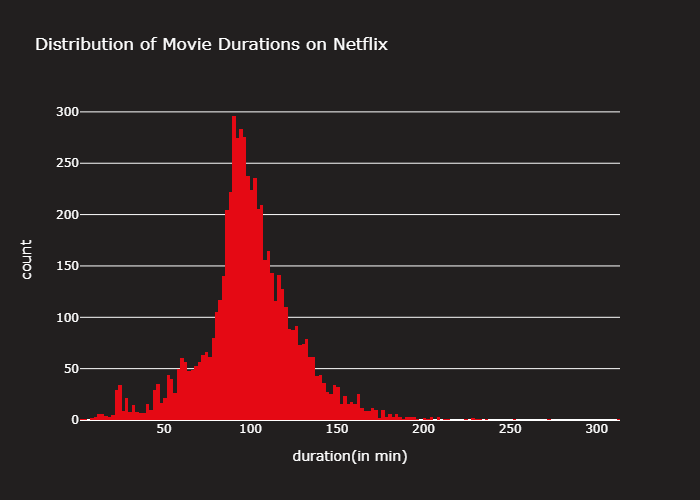

In [53]:
fig_movies = px.histogram(df, x='duration(in min)',
                          title='Distribution of Movie Durations on Netflix',
                          color_discrete_sequence=[netflix_red])  # Netflix red

fig_movies.update_layout(plot_bgcolor=netflix_black, paper_bgcolor=netflix_black, font_color=netflix_white)
fig_movies.show("png")

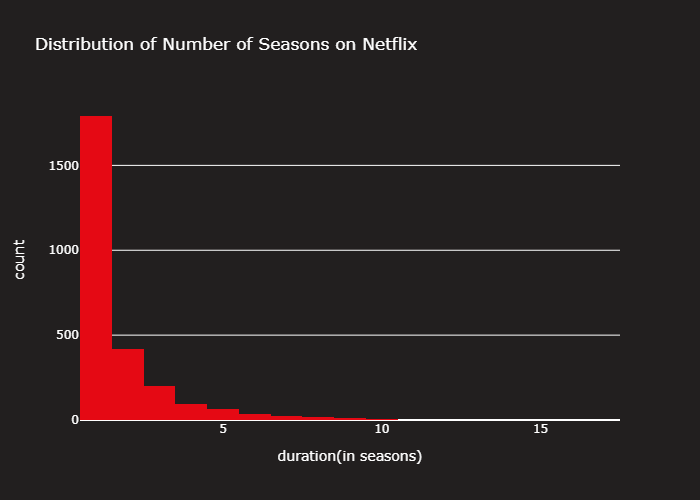

In [54]:
fig_movies = px.histogram(df, x='duration(in seasons)',
                          title='Distribution of Number of Seasons on Netflix',
                          color_discrete_sequence=[netflix_red])  # Netflix red

fig_movies.update_layout(plot_bgcolor=netflix_black, paper_bgcolor=netflix_black, font_color=netflix_white)
fig_movies.show("png")